In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print(f"open cv2 ver: {cv2.__version__}")

open cv2 ver: 4.5.5


In [153]:
white_spiderman = cv2.cvtColor(cv2.imread('b.jpg', cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
black_spiderman = cv2.cvtColor(cv2.imread('a.jpg', cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
white_spiderman = cv2.resize(white_spiderman, (512, 512))
black_spiderman = cv2.resize(black_spiderman, (512, 512), interpolation=cv2.INTER_LINEAR)
print(f"Size of black_spiderman is {black_spiderman.shape}")
print(f"Size of white_spiderman is {white_spiderman.shape}")

Size of black_spiderman is (512, 512, 3)
Size of white_spiderman is (512, 512, 3)


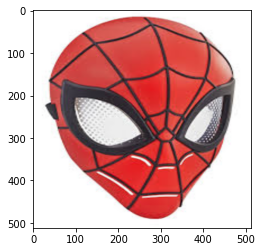

In [154]:
plt.imshow(white_spiderman)

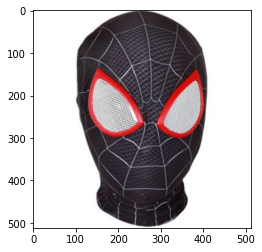

In [155]:
plt.imshow(black_spiderman)

In [156]:
gaussian_black_spiderman = [black_spiderman.copy()]
gaussian_white_spiderman = [white_spiderman.copy()]

In [157]:
temp_black = black_spiderman.copy()
for i in range(6):
    temp_black = cv2.pyrDown(temp_black)
    gaussian_black_spiderman.append(temp_black)

In [158]:
temp_white = white_spiderman.copy()
for i in range(6):
    temp_white = cv2.pyrDown(temp_white)
    gaussian_white_spiderman.append(temp_white)

In [159]:
temp_black = gaussian_black_spiderman[5]
lp_black = [temp_black]
for i in range(5, 0, -1):
    gauss_expand = cv2.pyrUp(gaussian_black_spiderman[i])
    laplace = cv2.subtract(gaussian_black_spiderman[i-1], gauss_expand)
    lp_black.append(laplace)

In [160]:
temp_white = gaussian_white_spiderman[5]
lp_white = [temp_white]
for i in range(5, 0, -1):
    gauss_expand = cv2.pyrUp(gaussian_white_spiderman[i])
    laplace = cv2.subtract(gaussian_white_spiderman[i-1], gauss_expand)
    lp_white.append(laplace)

In [161]:
white_and_black = []
for black_laplace, white_laplace in zip(lp_black, lp_white):
    cols, rows, ch = black_laplace.shape
    laplace_combined = np.hstack((black_laplace[:, 0:int(cols/2)], white_laplace[:, int(cols/2):]))
    white_and_black.append(laplace_combined)

In [162]:
spider_man_three = white_and_black[0]
for i in range(1, 6):
    spider_man_three = cv2.pyrUp(spider_man_three)
    spider_man_three = cv2.add(white_and_black[i], spider_man_three)

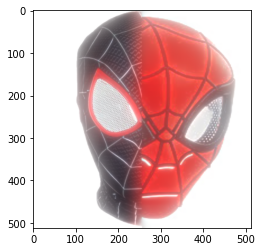

In [163]:
plt.imshow(spider_man_three)